In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import decimate
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

In [2]:
# speeds = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc').iloc[0].values[1:].astype(str)
# subjects = list(pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc').columns[1:].astype(str).str.split('.'))
# subject_index = dict()
# trial = 0
# last_speed = '-1'
# for i in range(len(subjects)):
#     if speeds[i] != last_speed:
#         trial = 0
#     else:
#         trial = trial + 1
#     last_speed = speeds[i]
#     subject_index[subjects[i][0]+','+speeds[i] + ','+ str(trial)] = i + 1

In [3]:
# data_acc = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc', skiprows=2)
# data_acc

In [4]:
# data_grf = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured GRF', skiprows=2)
# data_grf

In [5]:
# index = '1,2,0'
# a1 = data_acc.iloc[:,subject_index[index]].values
# time = data_acc.iloc[:,0].values[~np.isnan(a1)]
# a1_s = a1[~np.isnan(a1)]
# grf = data_grf.iloc[:,subject_index[index]].values
# grf = grf[~np.isnan(grf)]
# grf = decimate(grf, 30)

In [6]:
# plt.plot(time, grf, color='r')
# plt.xlabel('Tempo (ms)')
# plt.ylabel('GRF (N/kgf)')
# plt.legend()
# plt.grid(True)

In [7]:
# plt.plot(time, a1_s, color='r')
# plt.xlabel('Tempo (ms)')
# plt.ylabel('a1 (g)')
# plt.legend()
# plt.grid(True)

In [8]:
# v1 = cumulative_trapezoid(a1, dx=0.1, initial=0)
# p1 = cumulative_trapezoid(v1, dx=0.1, initial=0)

## Dados coletados no experimento

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


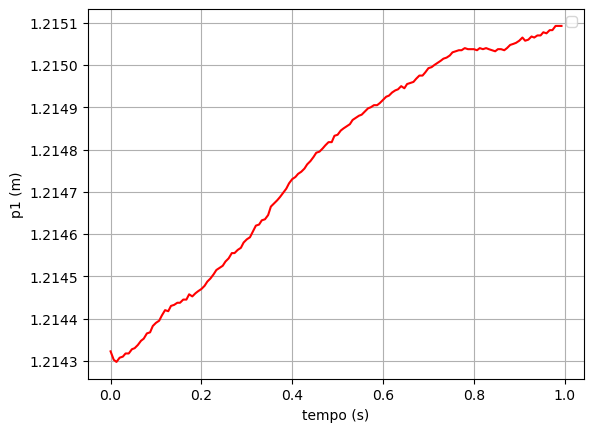

In [9]:
#Dados estáticos
data_static = pd.read_csv('RBDS002static.txt', sep='\t')
te = data_static['Time'].values[1]
trunk_mm = (data_static[['R.ASISX', 'R.ASISY', 'R.ASISZ']].values + data_static[['L.ASISX', 'L.ASISY', 'L.ASISZ']].values + data_static[['R.PSISX', 'R.PSISY', 'R.PSISZ']].values + data_static[['L.PSISX', 'L.PSISY', 'L.PSISZ']].values)/4
time = data_static['Time'].values

p1 = trunk_mm[:,2]/1000
v1 = np.gradient(p1, time)          #m/s
a1 = np.gradient(v1, time)          #m/s²


plt.plot(time, trunk_mm[:,2]/1000,color="r")
plt.xlabel('tempo (s)')
plt.ylabel('p1 (m)')
plt.legend()
plt.grid(True)

In [10]:
# pd.set_option('display.max_columns', None)
# data_static

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


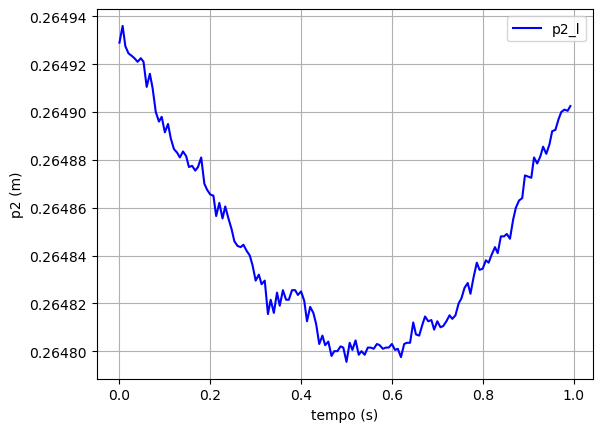

In [11]:
#Avaliação individual de cada joelho estático:

# knee_l =data_static[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values     #joelho direito 
# knee_r =data_static[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values     #joelho esquerdo

knee = (data_static[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values + data_static[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values)/2 
p2 = knee[:,1]/1000
v2 = np.gradient(p2, time)          #m/s
a2 = np.gradient(v2, time)          #m/s²

# p2_r = knee_r[:,1]/1000               #m
# v2_r = np.gradient(p2_r, dt)          #m/s
# a2_r = np.gradient(v2_r, dt)          #m/s²

# plt.plot(time, p2_l,label="p2_l", color="r")
# plt.plot(time, p2_r,label="p2_r", color="b")

plt.xlabel('Tempo (s)')
plt.ylabel('p2 (m)')
plt.legend()
plt.grid(True)
plt.plot(time, p2,label="p2_l", color="b")
plt.xlabel('tempo (s)')
plt.ylabel('p2 (m)')
plt.legend()
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


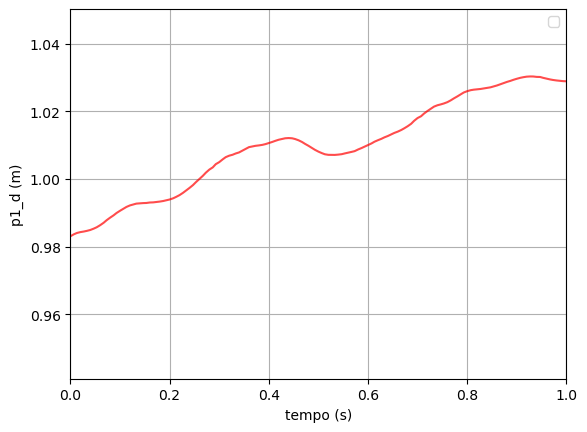

In [12]:
#Importação dos dados dinâmicos:

data_dynamic = pd.read_csv('RBDS002runT25markers.txt', sep='\t')
td = data_dynamic['Time'].values[1]
trunk_d = (data_dynamic[['R.ASISX', 'R.ASISY', 'R.ASISZ']].values + data_dynamic[['L.ASISX', 'L.ASISY', 'L.ASISZ']].values + data_dynamic[['R.PSISX', 'R.PSISY', 'R.PSISZ']].values + data_dynamic[['L.PSISX', 'L.PSISY', 'L.PSISZ']].values)/4
time_d = data_dynamic['Time'].values

p1_d = trunk_d[:,2]/1000

plt.plot(time_d, p1_d,color="r",alpha=0.7)
plt.xlim(0, 1)
plt.xlabel('tempo (s)')
plt.ylabel('p1_d (m)')
plt.legend()
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


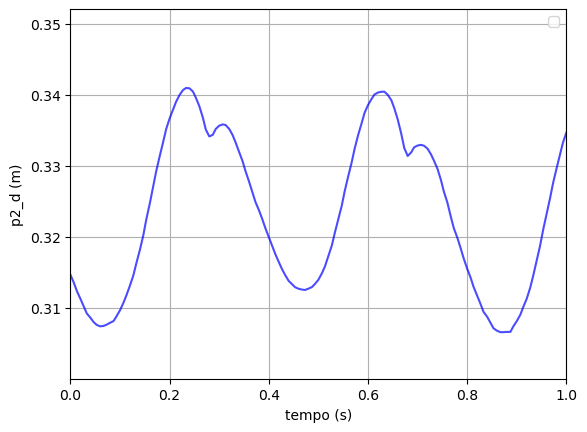

In [13]:
#Avaliação individual de cada joelho durante a corrida:

# knee_l_d =data_dynamic[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values     #joelho direito 
# knee_r_d =data_dynamic[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values     #joelho esquerdo

# p2_l_d = knee_l_d[:,1]/1000                                      #m
# v2_l_d = np.gradient(p2_l_d, t)                                  #m/s
# a2_l_d = np.gradient(v2_l_d, t)                                  #m/s

# p2_r_d = knee_r_d[:,1]/1000                                      #m
# v2_r_d = np.gradient(p2_r_d, t)                                  #m/s
# a2_r_d = np.gradient(v2_r_d, t)                                  #m/s

knee_d = (data_dynamic[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values + data_dynamic[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values)/2
p2_d = knee_d[:,1]/1000                                           #m
v2_d = np.gradient(p2_d, time_d)                                  #m/s
a2_d = np.gradient(v2_d, time_d)                                  #m/s

plt.plot(time_d, p2_d,color="b",alpha=0.7)
plt.xlim(0, 1)
plt.xlabel('tempo (s)')
plt.ylabel('p2_d (m)')
plt.legend()
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


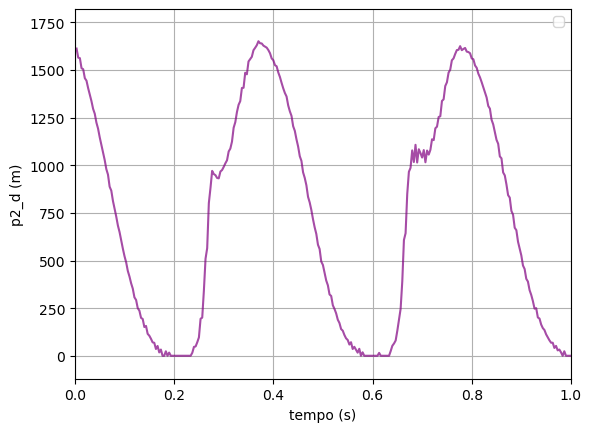

In [14]:
Forces = pd.read_csv('RBDS002runT25forces.txt', sep='\t')
sample = Forces['Time'].values
MGRF = Forces[['Fy']].values
time_Fy = sample/300

plt.plot(time_Fy, MGRF,alpha=0.7, color='purple')
plt.xlim(0, 1)
plt.xlabel('tempo (s)')
plt.ylabel('p2_d (m)')
plt.legend()
plt.grid(True)

In [15]:
#Parâmetros da amostra RBDS002static

M = 80*9.81              # kgf
g = -9.81           # Valor em m/s².
c = 0.35            # Derrick, cita intervalo de 0,15 a 0,55 foi sugerido 0,35 e Berme cita 0,20 a 0,67

In [16]:
# Otimizações, condição inicial:

#theta[0] = omega2² 
#theta[1] = omega1²
#theta[2] = lambda_m
#theta[3] = ksi_l

# def erro_0(theta, p2, p1, v2, g): 
#     return np.sum((a2 - (-theta[0]*p2 + theta[1]*theta[2]*(p1 - p2) - 2*theta[3]*theta[0]*v2 + g))**2)     
# theta = minimize(erro_0, [2, 3, 2, 0.1], (p2, p1, v2, g), method='TNC', bounds=((0,15), (0,15), (0,10), (0,0.25))).x     
# theta


def erro_0(theta, p2, p1, v2, g): 
    return np.sum((a2 - (-theta[0]*p2 + theta[1]*theta[2]*(p1 - p2) - 2*theta[3]*theta[0]*v2 + g))**2)     
theta = minimize(erro_0, [1, 2, 3, 0.1], (p2, p1, v2, g), method='TNC', bounds=((0,5), (0,10), (0,10), (0,0.25))).x     
theta


## Mesmo alterando os valores iniciais e intervalo de otimização, não há alteração nos valores obtidos e Euler. Há duas vesões de
## otimizações

array([1.72157577, 2.92594953, 3.69282055, 0.10848188])

C:\Users\Tiago\AppData\Local\Temp\ipykernel_27672\2984141932.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v2[i + 1] = v2[i] + dt*dv2dt


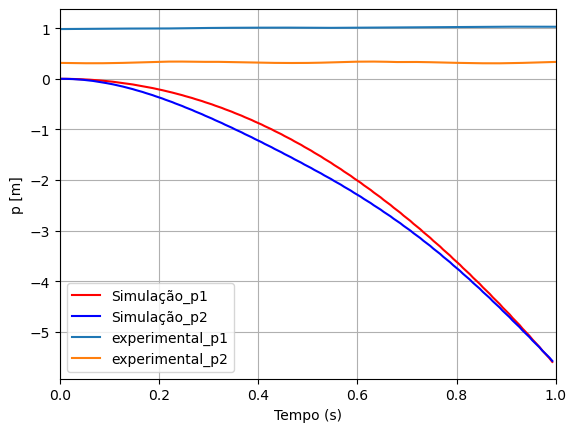

In [17]:
omega_2 = theta[0]
omega_1 = theta[1]
lambda_m = theta[2]
ksi_l = theta[3]

#Método de Euler

# Equações:
#  a1 = -omega1*(p1 - p2) + g
#  a2 = -omega_2*p2 + omega_1*lambda_m*(p1 - p2) - ((MGRF*(1 + lambda_m) - omega_2*p2)/M) + g

dt = time[1]    # passo
#t = time

# Condições iniciais
p1 = np.zeros(len(time))
v1 = np.zeros(len(time))
p2 = np.zeros(len(time))
v2 = np.zeros(len(time))

p1[0] = 0.0     
v1[0] = 0.0     
p2[0] = 0.0
v2[0] = 0.0
  
# Método de Euler
for i in range(len(time) - 1):
    
    dv1dt = -omega_1*(p1[i] - p2[i]) + g
    dp1dt = v1[i]

    v1[i + 1] = v1[i] + dt*dv1dt
    p1[i + 1] = p1[i] + dt*dp1dt
    
    dv2dt = -omega_2*p2[i] + omega_1*lambda_m*(p1[i] - p2[i]) - ((MGRF[i]*(1 + lambda_m) - omega_2*p2[i])/M) + g
    dp2dt = v2[i]
    
    v2[i + 1] = v2[i] + dt*dv2dt
    p2[i + 1] = p2[i] + dt*dp2dt
    

plt.plot(time, p1, color='r', label='Simulação_p1')
plt.plot(time, p2, color='b', label='Simulação_p2')
plt.plot(time_d, p1_d, label = "experimental_p1")
plt.plot(time_d, p2_d, label = "experimental_p2")
plt.xlim(0, 1)
plt.xlabel('Tempo (s)')
plt.ylabel('p [m]')
plt.legend()
plt.grid(True)
plt.show()

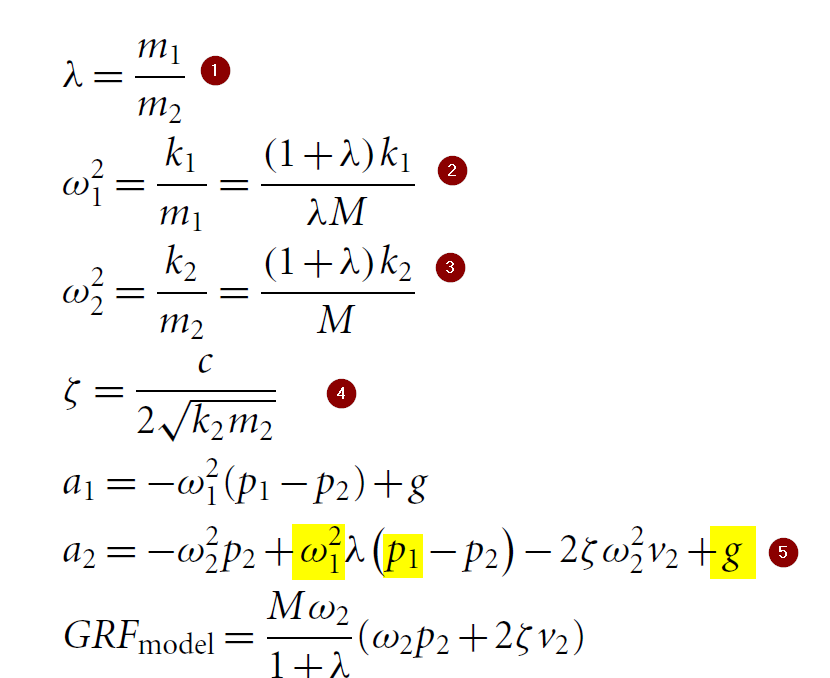



